# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm

In [2]:
data = pd.read_csv("house_price.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.sample(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
197,4956000,2800,3,2,2,no,no,yes,no,yes,1,no,semi-furnished
424,3360000,3100,3,1,2,no,no,yes,no,no,0,no,semi-furnished
84,6510000,3760,3,1,2,yes,no,no,yes,no,2,no,semi-furnished
253,4515000,3520,2,1,2,yes,no,no,no,no,0,yes,furnished
305,4193000,3450,3,1,2,yes,no,no,no,no,1,no,semi-furnished
255,4480000,5885,2,1,1,yes,no,no,no,yes,1,no,unfurnished
146,5600000,10500,2,1,1,yes,no,no,no,no,1,no,semi-furnished
491,2835000,2640,2,1,1,no,no,no,no,no,1,no,furnished
128,5873000,5500,3,1,3,yes,yes,no,no,yes,1,no,furnished
290,4200000,2610,4,3,2,no,no,no,no,no,0,no,semi-furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### 评估和清理

结构性问题

从乍一看结构来看，符合每行是一个观察对象，每列是一个对象的属性，就是自变量，然后每个空也是只有一个值，应该要把object类的分类数据转一下category，减少占用内存

In [5]:
data["mainroad"] =data["mainroad"].astype("category")
data["guestroom"] =data["guestroom"].astype("category")
data["basement"] =data["basement"].astype("category")
data["hotwaterheating"] =data["hotwaterheating"].astype("category")
data["airconditioning"] =data["airconditioning"].astype("category")
data["prefarea"] =data["prefarea"].astype("category")
data["furnishingstatus"] =data["furnishingstatus"].astype("category")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


内容性问题

**处理空值**

从上面的info可以看出，不存在空值，分类数据下也不存在异常值，我们可以看看价格和面积会不会有0或者负数吧，卧室、浴室、楼层、车容量看看有没有负数，就是其实看看有没有异常值、无效数据了


In [7]:
data.query("price <= 0")  #价格没问题

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [8]:
data.query("area <= 0") #面积没问题

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [9]:
data.query("bedrooms <= 0")  #卧室==0的都没有，小于0更没有

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [10]:
data.query("bathrooms <= 0") #浴室也正常

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [11]:
data.query("stories <= 0")  #楼层没有0楼的，更没有地下楼，合理

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [12]:
data.query("parking < 0")  #车容量倒是有0的，不少，有的房源就是没有停车位呀！没有负数，就合理。

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


**处理重复**

In [13]:
data.duplicated().values.sum() #没有重复的，而且每一个变量下也允许重复呀，价格可以重复吧，面积也可以刚巧重复吧，其他也是。

np.int64(0)

**处理无效数据**

**在处理空值那，已经处理了，基本上没有无效的**

**处理不一致**

In [14]:
data["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

不一致数据那，基本看分类数据比如有没有字体字母大小写不一致，前面也检查了，没有不一致，至此，评估和清理结束

### 整理数据

In [15]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


不需要进行分组。

### 保存数据

In [16]:
cleaned_data = data.copy()

In [17]:
cleaned_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### 探索数据（分析前期）

看一下房价的分布

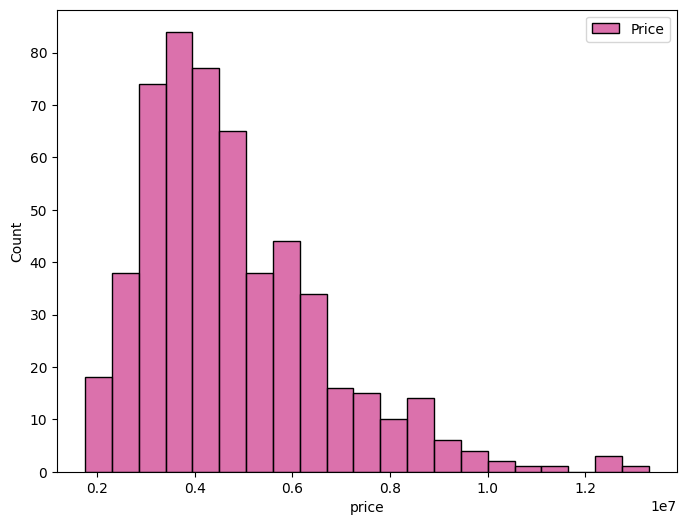

In [18]:
plt.figure(figsize=(8,6))
sns.set_palette("PiYG")
sns.histplot(cleaned_data["price"],label="Price")
plt.legend()
plt.show()

**可以看到房价呈现右偏态，说明有部分高价楼房拉长了**

看一下面积

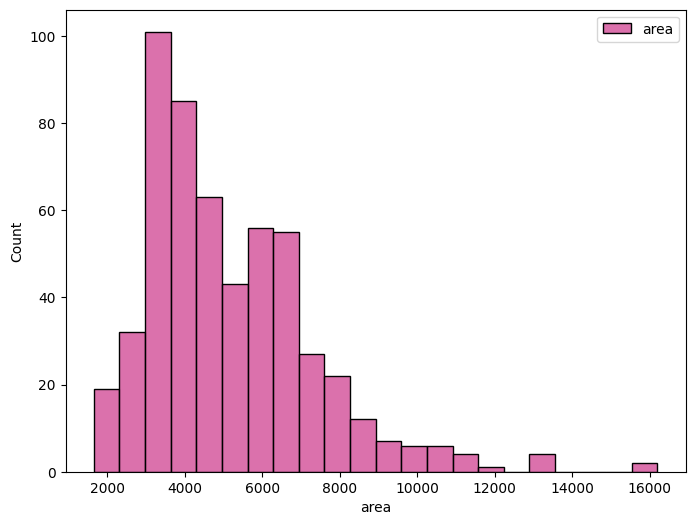

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(cleaned_data["area"],label="area")
plt.legend()
plt.show()

**面积也是呈现右偏态，部分楼房有极高的面积**

看一下卧室数量

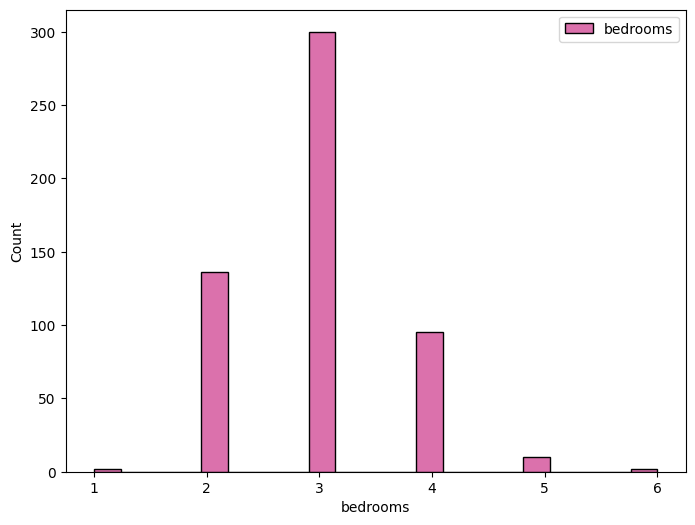

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(cleaned_data["bedrooms"],label="bedrooms")
plt.legend()
plt.show()

**卧室数量在1-6之间，主要平均在3个卧室**

看一下楼层数

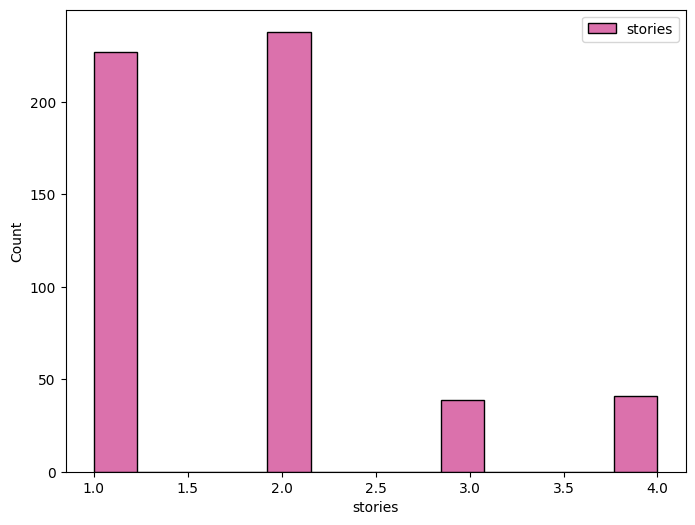

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(cleaned_data["stories"],label="stories")
plt.legend()
plt.show()


**楼层数主要在1、2楼**

看一下停车位

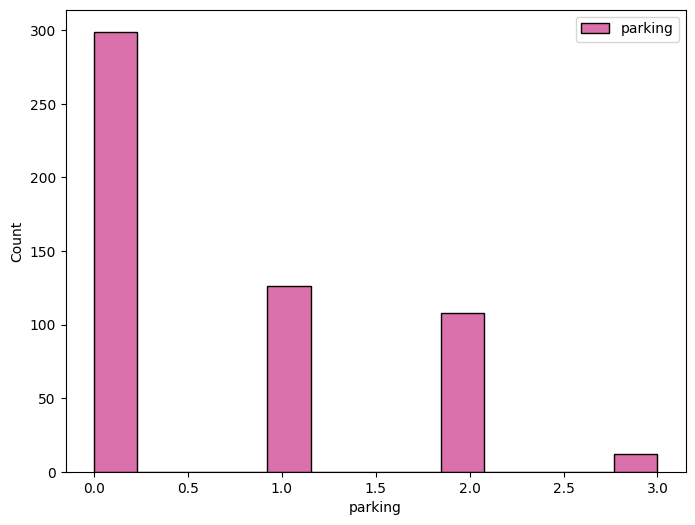

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(cleaned_data["parking"],label="parking")
plt.legend()
plt.show()

**可以看到很多楼房没有停车位，有三个停车位的最少**

### 房价和面积的关系

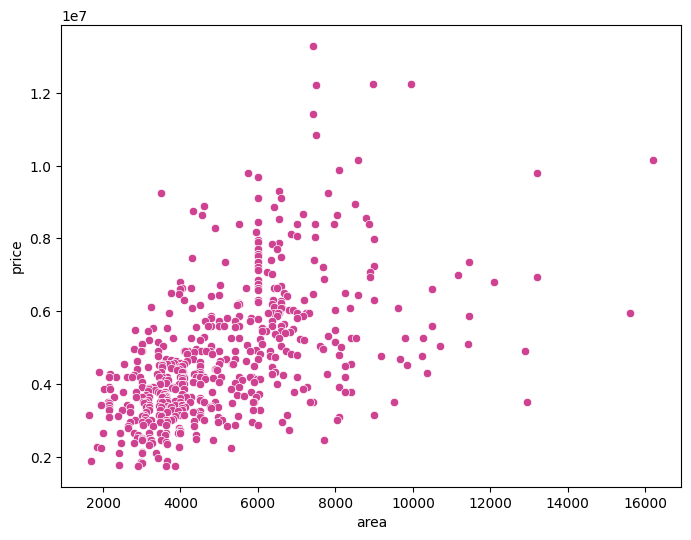

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(cleaned_data,x="area",y="price")
plt.show()

**可以看到，随着面积的增加，基本上价格也是上涨的，说明两者存在一定的相关性，但是要不要去除其中一个自变量得看相关系数**

In [24]:
cleaned_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### 房价和卧室数量的关系

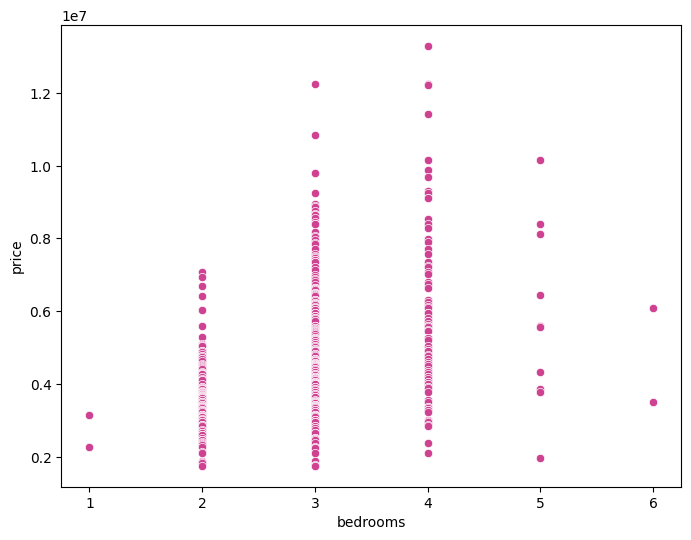

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(cleaned_data,x="bedrooms",y="price")
plt.show()

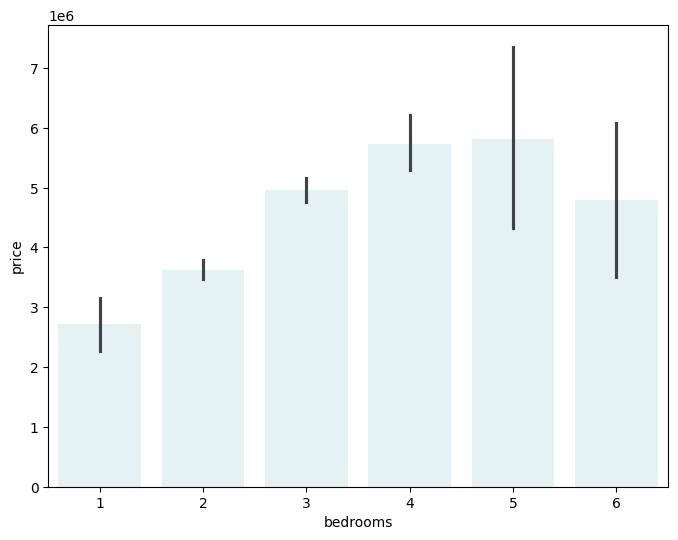

In [26]:
plt.figure(figsize=(8,6))
sns.set_palette("BuGn")
sns.barplot(cleaned_data,x="bedrooms",y="price")
plt.show()

**可以看到，在1-4这样卧室数量上升的时候房价也是上涨的，但是再增加卧室数量就不一定了**

### 房价与浴室数量的关系

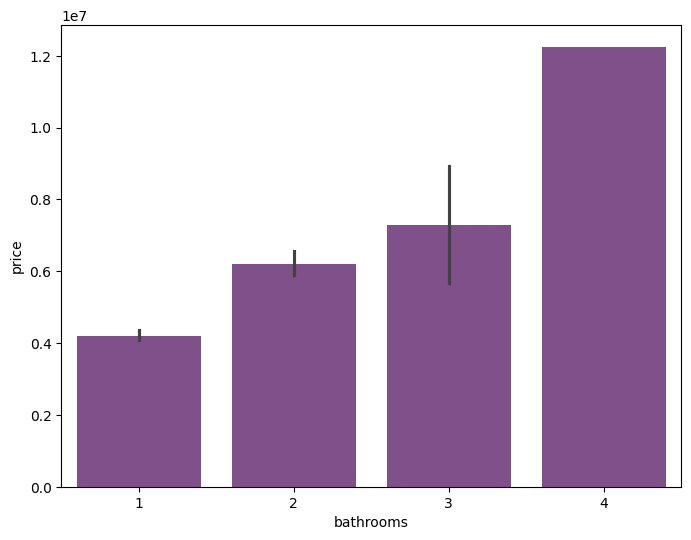

In [27]:
plt.figure(figsize=(8,6))
sns.set_palette("PRGn")
sns.barplot(cleaned_data,x="bathrooms",y="price")
plt.show()

**可以看到，随着浴室的增加，房价基本上也是上升的，有一定的相关性**

### 房价与楼层的关系

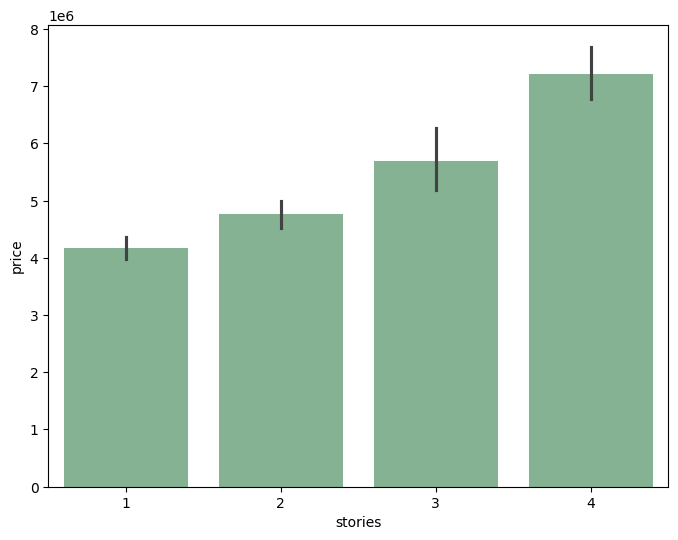

In [28]:
plt.figure(figsize=(8,6))
sns.set_palette("crest")
sns.barplot(cleaned_data,x="stories",y="price")
plt.show()

**可以看到，随着楼层的增加，房价基本上也是上升的，有一定的相关性**

### 房价与车库容量的关系

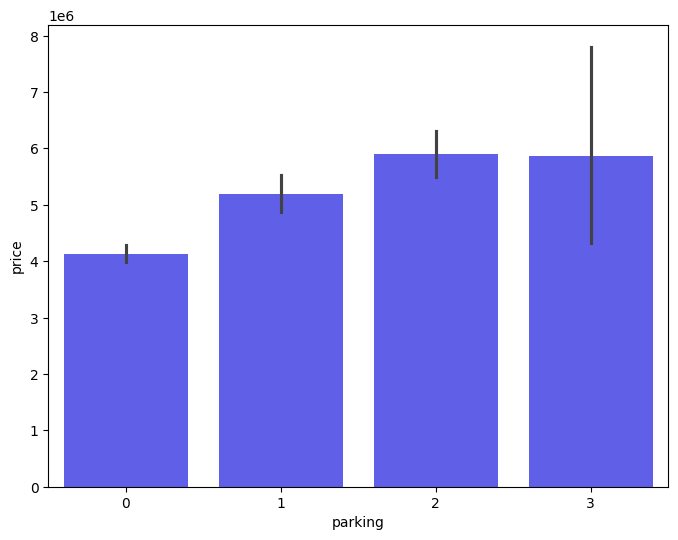

In [29]:
plt.figure(figsize=(8,6))
sns.set_palette("bwr")
sns.barplot(cleaned_data,x="parking",y="price")
plt.show()

**可以看到车库的容量对于价格其实感觉影响不大啊，2个之内还是能说有上升的，但是3个车容量也不好说。相不相关再看相关系数吧！**

### **上面我们看了数值数据每个的情况，以及看每个数值数据对于因变量房价的两两关系，部分我们说带有一点正相关的倾向，接下来我们看分类数据对于因变量的影响！**

In [30]:
cleaned_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### 房价与是否在主路的关系

<function matplotlib.pyplot.show(close=None, block=None)>

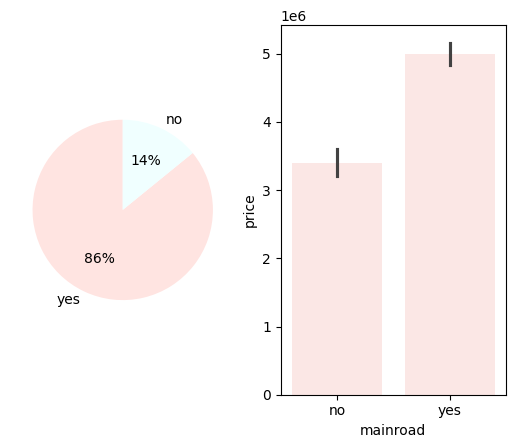

In [31]:
figure,axes = plt.subplots(1, 2)
#plt.figure(figsize=(8,6))
mainroad_count = cleaned_data["mainroad"].value_counts()  #饼图是需要数量的，计算百分比
axes[0].pie(   #跟我们之前的绘图不一样，之前是在只绘制一行只有一个图的情况，我们直接plt.pie,但这里是一行两个图，就是坐标axes[0].pie
    mainroad_count,
    labels=mainroad_count.index,
    autopct="%.0f%%",
    startangle=90,
    colors=["#FFE4E1","#F0FFFF"]
)
sns.barplot(cleaned_data,x="mainroad",y="price",ax=axes[1],color="#FFE4E1")
plt.show

**可以看到，大部分位于主路的楼价都是高于不位于主路的。**

### 房价与是否与客人房存在关系

<function matplotlib.pyplot.show(close=None, block=None)>

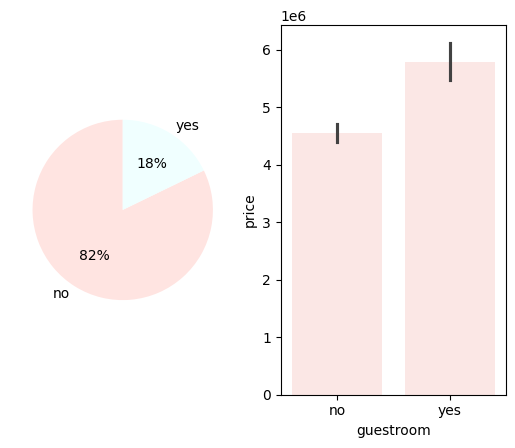

In [32]:
figure,axes = plt.subplots(1, 2)
guestroom_counts = cleaned_data["guestroom"].value_counts()
axes[0].pie(
    guestroom_counts,
    labels = guestroom_counts.index,
    autopct = "%.0f%%",
    startangle = 90,
    colors=["#FFE4E1","#F0FFFF"]
)
sns.barplot(cleaned_data,x="guestroom",y="price",color="#FFE4E1")
plt.show

**可以看到，大部分的楼房都是没有客人房的，而有客人房得价格都高于没有客人房的**

### 房价与是否与地下室存在关系

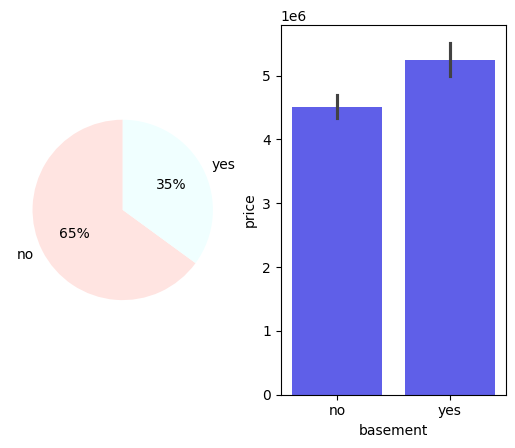

In [33]:
figure,axes = plt.subplots(1,2)
basement_counts = cleaned_data["basement"].value_counts()
axes[0].pie(
    basement_counts,
    labels=basement_counts.index,
    autopct = "%.0f%%",
    startangle=90,
     colors=["#FFE4E1","#F0FFFF"]
)
sns.set_palette("BuGn")
sns.barplot(cleaned_data,x="basement",y="price")
plt.show()

**可以看到，大部分的楼房都是没有地下室的，而有地下室的价格都高于没有地下室的**

### 房价与是否与热水器存在关系

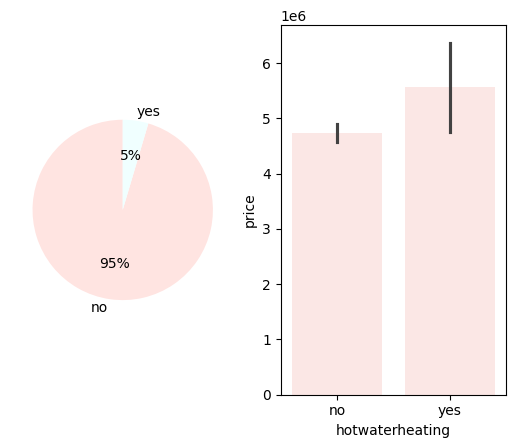

In [34]:
figure,axes = plt.subplots(1,2)
hotwaterheating_counts = cleaned_data["hotwaterheating"].value_counts()
axes[0].pie(
    hotwaterheating_counts,
    labels=hotwaterheating_counts.index,
    autopct = "%.0f%%",
    startangle=90,
    colors=["#FFE4E1","#F0FFFF"]
)
sns.barplot(cleaned_data,x="hotwaterheating",y="price",color="#FFE4E1")
plt.show()

In [35]:
hotwaterheating_counts

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

**可以看到，大部分的楼房都是没有热水器的，而有热水器的价格都高于没有热水器的**

### 房价与是否与空调存在关系 

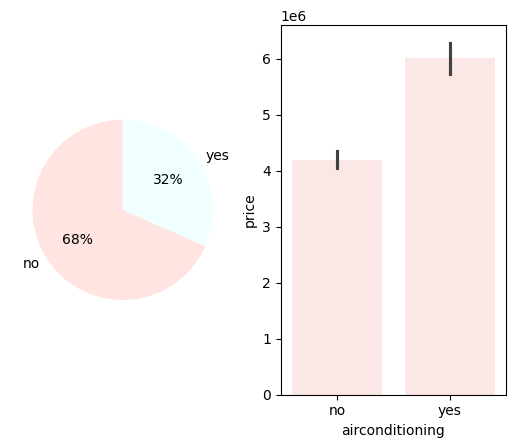

In [36]:
figure,axes = plt.subplots(1,2)
airconditioning_counts = cleaned_data["airconditioning"].value_counts()
axes[0].pie(
    airconditioning_counts,
    labels=airconditioning_counts.index,
    autopct = "%.0f%%",
    startangle=90,
    colors=["#FFE4E1","#F0FFFF"]
)
sns.barplot(cleaned_data,x="airconditioning",y="price",color="#FFE4E1")
plt.show()

**可以看到，大部分的楼房都是没有空调的，而有空调的价格都高于没有空调的**

### 房价与是否与在城市首选地区存在关系 

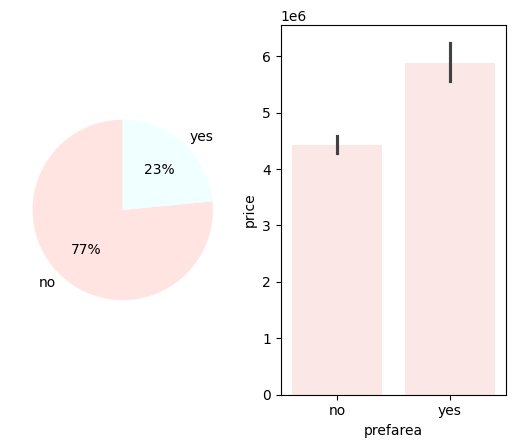

In [37]:
figure,axes = plt.subplots(1,2)
prefarea_counts = cleaned_data["prefarea"].value_counts()
axes[0].pie(
    prefarea_counts,
    labels=prefarea_counts.index,
    autopct = "%.0f%%",
    startangle=90,
    colors=["#FFE4E1","#F0FFFF"]
)
sns.barplot(cleaned_data,x="prefarea",y="price",color="#FFE4E1")
plt.show()

In [38]:
prefarea_counts

prefarea
no     417
yes    128
Name: count, dtype: int64

**可以看到，大部分的楼房都是不位于首选地区的，而位于首选地区的价格都高于不是首选地区的**

### 房价与装修形式的关系

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11404\1975932923.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')


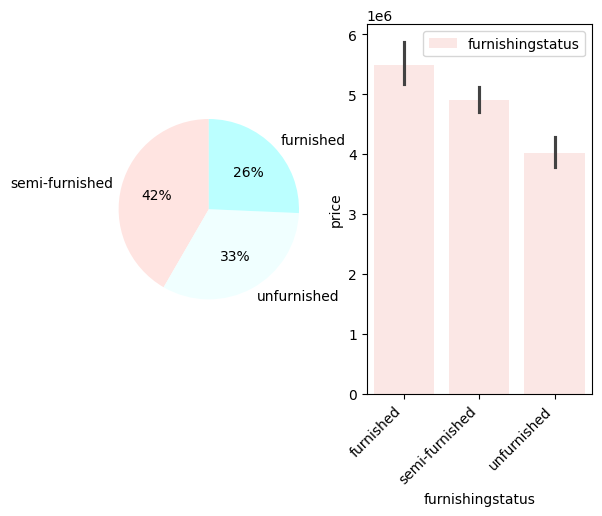

In [39]:
figure,axes=plt.subplots(1,2)
furnishingstatus_counts = cleaned_data["furnishingstatus"].value_counts()
axes[0].pie(
    furnishingstatus_counts,
    labels = furnishingstatus_counts.index,
    autopct="%.0f%%",
    startangle=90,
    colors=["#FFE4E1","#F0FFFF","#BBFFFF"]
)
sns.barplot(cleaned_data,x="furnishingstatus",y="price",color="#FFE4E1",label="furnishingstatus",ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

**可以看到最多的房间是简装，其次是毛坯房，但是精装的房依然是最贵的，然后才是精装，毛坯房算是当中最便宜的**

## 分析数据（线性回归）

为了保证线性回归模型不影响原始的已经经过评估清理整理的原始数据集`cleaned_data`，我们就再另起一个df吧，因为我们还要对里面的数据，尤其是分类变量进行一个建立虚拟变量的操作

In [40]:
data = cleaned_data.copy()

In [41]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### 线性回归第一步，对所有的分类变量进行转换成虚拟变量

In [42]:
data = pd.get_dummies(data,columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"],dtype=int,drop_first=True)

In [43]:
data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


**pandas的get_dummies方法是传入df，然后指定是那些列columns，然后具体转成什么数据类型dtype，最后就是说要不要删除第一个变量drop_first，而对这些columns里的变量进行get_dummies后，源数据集里这些就全没了，全变成了虚拟变量，而由于drop_first会删掉其中一个，比如basement下有yes和no，调用get_dummies时会删掉原本的basement列，变成两个虚拟变量列，而由于drop_first所以变成了只有一个虚拟变量，而像furnishingstatus这个有三个变量值，那么调用后删掉原本的变量列变成三个虚拟变量，再删掉其中一个就变差了两列虚拟变量**

### 线性回归第二步，对所有的自变量进行相关系数的计算，再提取出因变量与自变量，对dataframe使用corr().abs()来查看

In [44]:
data.corr().abs()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,0.009229,0.222393,0.234779,0.006156,0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,0.172394,0.018847,0.293602,0.044425,0.003648,0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,0.165705
mainroad_yes,0.296898,0.288874,0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,0.011781,0.105423,0.199876,0.011450,0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,0.010308,0.138179,0.160897,0.005821,0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,0.117935
hotwaterheating_yes,0.093073,0.009229,0.046049,0.067159,0.018847,0.067864,0.011781,0.010308,0.004385,1.000000,0.130023,0.059411,0.063819,0.059194


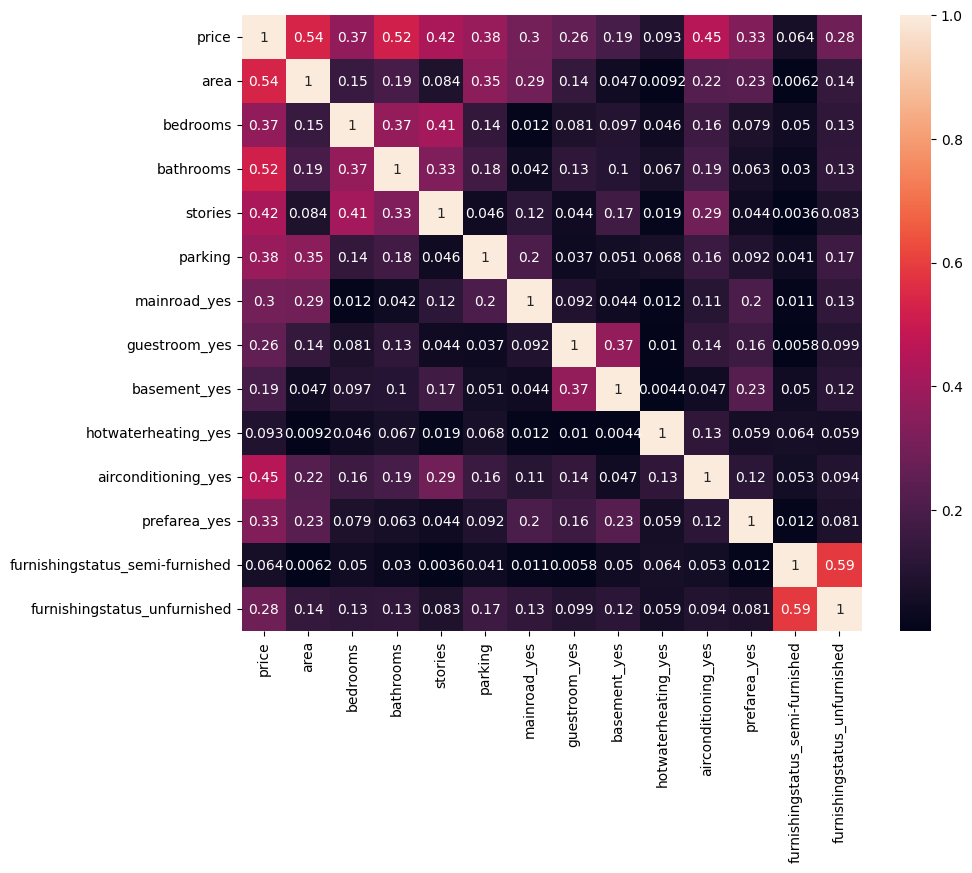

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr().abs(),annot=True)
plt.show()

一般我们认为，当相关系数的绝对值大于0.8的时候，可能导致严重共线性，所以我们检查的时候，找绝对值大于0.8的值即可。在这里所有的自变量之间，注意是自变量之间哈，都是不超过0.8的

In [46]:
y = data["price"]
x = data.drop("price",axis=1)

In [47]:
x

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,0,0


### 线性回归第三步，给截距作为一个系数加入进来计算，因为截距作为自变量的话，它的自变量值均为1，恒等于1，因此给x这个自变量df加一个常量即可,使用api库里的add_constant

In [48]:
x = sm.add_constant(x)

In [49]:
x

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


### 线性回归第四步，建立线性回归模型，使用api库里的OLS，最小二乘法的意思，传入因变量y和自变量x，再对其调用fit（）拟合操作

In [50]:
model = sm.OLS(y,x).fit()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          9.07e-123
Time:                        15:38:49   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**我们总结一下，第一，这个R方的值为0.682，说明拟合程度其实并不是很高，只能说是中上水准，再者，这里我们看p>|t|这一列下，下面的值表示的是每个自变量对于因变量来说是否存在显著的统计上的预测影响，如果p小于0.05（0.8是第二步查看自变量之间相关程度是否过高的标准，0.05是看最后每个自变量对于因变量的是否存在显著预测影响的值），说明这个自变量是对因变量有一个很明显的预测作用，说明有用可以保留这个自变量，但是如果大于0.05，那说明这个自变量对于预测因变量其实没什么显著的预测作用，可以删掉了**

const(截距)、bedrooms、furnishingstatus_semi-furnished是对我们的因变量预测是没什么用的，应该要删除，重新拟合一个线性回归模型！

In [52]:
x = x.drop(["const","bedrooms","furnishingstatus_semi-furnished"],axis=1) 

In [53]:
x

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,3,1,0,0,0,1,0,0
2,9960,2,2,2,1,0,1,0,0,1,0
3,7500,2,2,3,1,0,1,0,1,1,0
4,7420,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,1,2,1,0,1,0,0,0,1
541,2400,1,1,0,0,0,0,0,0,0,0
542,3620,1,1,0,1,0,0,0,0,0,1
543,2910,1,1,0,0,0,0,0,0,0,0


In [54]:
model = sm.OLS(y,x).fit()

In [55]:
model

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                        0.00
Time:                        15:38:50   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R方的值高达0.957，说明与实际的数据拟合程度极其高，而且各项自变量的p值都小于0.05，说明对因变量有很显著的预测影响**

model.predict()可以用来预测各个未知的数据DataFrame了，但必须保证这个dataframe必须是与这个模型的自变量保持一致！

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

In [57]:
x

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,3,1,0,0,0,1,0,0
2,9960,2,2,2,1,0,1,0,0,1,0
3,7500,2,2,3,1,0,1,0,1,1,0
4,7420,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,1,2,1,0,1,0,0,0,1
541,2400,1,1,0,0,0,0,0,0,0,0
542,3620,1,1,0,1,0,0,0,0,0,1
543,2910,1,1,0,0,0,0,0,0,0,0


In [58]:
price_to_predict = pd.DataFrame({'area': [5600], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']})

In [59]:
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


我们需要把分类变量的类型转换为Category，并且通过`categories`参数，让程序知道所有可能的分类值。这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。

In [60]:
price_to_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              1 non-null      int64 
 1   bedrooms          1 non-null      int64 
 2   bathrooms         1 non-null      int64 
 3   stories           1 non-null      int64 
 4   mainroad          1 non-null      object
 5   guestroom         1 non-null      object
 6   basement          1 non-null      object
 7   hotwaterheating   1 non-null      object
 8   airconditioning   1 non-null      object
 9   parking           1 non-null      int64 
 10  prefarea          1 non-null      object
 11  furnishingstatus  1 non-null      object
dtypes: int64(5), object(7)
memory usage: 228.0+ bytes


In [61]:
price_to_predict[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]] = price_to_predict[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]].astype("category")

In [62]:
price_to_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   area              1 non-null      int64   
 1   bedrooms          1 non-null      int64   
 2   bathrooms         1 non-null      int64   
 3   stories           1 non-null      int64   
 4   mainroad          1 non-null      category
 5   guestroom         1 non-null      category
 6   basement          1 non-null      category
 7   hotwaterheating   1 non-null      category
 8   airconditioning   1 non-null      category
 9   parking           1 non-null      int64   
 10  prefarea          1 non-null      category
 11  furnishingstatus  1 non-null      category
dtypes: category(7), int64(5)
memory usage: 991.0 bytes


In [63]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['no', 'yes'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['no', 'yes'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['no', 'yes'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['no', 'yes'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['no', 'yes'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['no', 'yes'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])
price_to_predict["furnishingstatus"]  #这一列已经是一个category类的series了

0    semi-furnished
Name: furnishingstatus, dtype: category
Categories (3, object): ['furnished', 'semi-furnished', 'unfurnished']

In [64]:
price_to_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   area              1 non-null      int64   
 1   bedrooms          1 non-null      int64   
 2   bathrooms         1 non-null      int64   
 3   stories           1 non-null      int64   
 4   mainroad          1 non-null      category
 5   guestroom         1 non-null      category
 6   basement          1 non-null      category
 7   hotwaterheating   1 non-null      category
 8   airconditioning   1 non-null      category
 9   parking           1 non-null      int64   
 10  prefarea          1 non-null      category
 11  furnishingstatus  1 non-null      category
dtypes: category(7), int64(5)
memory usage: 1.0 KB


In [65]:
price_to_predict  

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


In [66]:
x

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,3,1,0,0,0,1,0,0
2,9960,2,2,2,1,0,1,0,0,1,0
3,7500,2,2,3,1,0,1,0,1,1,0
4,7420,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,1,2,1,0,1,0,0,0,1
541,2400,1,1,0,0,0,0,0,0,0,0
542,3620,1,1,0,1,0,0,0,0,0,1
543,2910,1,1,0,0,0,0,0,0,0,0


In [67]:
price_to_predict = pd.get_dummies(price_to_predict,columns=['mainroad', 'guestroom','basement', 'hotwaterheating','airconditioning','prefarea','furnishingstatus'],dtype=int,drop_first=True)

In [68]:
price_to_predict

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,0,0,1,1,0,1,1,0


In [69]:
x

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,3,1,0,0,0,1,0,0
2,9960,2,2,2,1,0,1,0,0,1,0
3,7500,2,2,3,1,0,1,0,1,1,0
4,7420,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,1,2,1,0,1,0,0,0,1
541,2400,1,1,0,0,0,0,0,0,0,0
542,3620,1,1,0,1,0,0,0,0,0,1
543,2910,1,1,0,0,0,0,0,0,0,0


In [70]:
price_to_predict = price_to_predict.drop(["bedrooms","furnishingstatus_semi-furnished"],axis=1)

In [71]:
price_to_predict

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,5600,2,2,2,0,0,1,1,0,1,0


In [72]:
model.predict(price_to_predict)

0    7.071927e+06
dtype: float64

根据最佳的线性回归模型预测这个楼房价格为7071927。